# Bootstrap
Let's you get at the sampling distribution of statistics for which it's really hard
to develop theoretical versions. Ity gives us an easy way of doing statistics when
the theory is really hard.

Very handy way of getting very good reliable estimates of standard error for nasty statistics.

Minimum risk investment - Book 5.2

In [2]:
require(ISLR)
require(boot)

Loading required package: ISLR

Loading required package: boot



In [3]:
# two investments, x and y.
alpha <- function(x, y) {
    # risk is var(x) and var(y)
    vx <- var(x)
    vy <- var(y)
    # covariance of x and y
    cxy <- cov(x, y)
    # formula for getting a minimum risk investment is:
    # alpha = var(y) - covar(x, y) / var(x) + var(y) - 2 * covar(x, y)
    (vy - cxy) / (vx + vy - 2 * cxy)
}

alpha(Portfolio$X, Portfolio$Y)

[1] 0.5758321

In [7]:
# What is the standard error of alpha?

# In order to use bootstrap.
alpha.fn <- function(data, index) {
    # using the data in the first parameter, dataframe,
    # execute the second parameter command.
    with(data[index, ], alpha(X, Y))
}

alpha.fn(Portfolio, 1:100)


[1] 0.5758321

In [8]:
# Since the bootstrap involves random sampling, and we want to get reproducible results.
set.seed(1)
# Run our function but we take a random sample (1-100).
# This is what bootstrap does over and over.
alpha.fn(Portfolio, sample(1:100, 100, replace = TRUE))

[1] 0.7368375


ORDINARY NONPARAMETRIC BOOTSTRAP


Call:
boot(data = Portfolio, statistic = alpha.fn, R = 1000)


Bootstrap Statistics :
     original       bias    std. error
t1* 0.5758321 -0.001539618  0.08846251

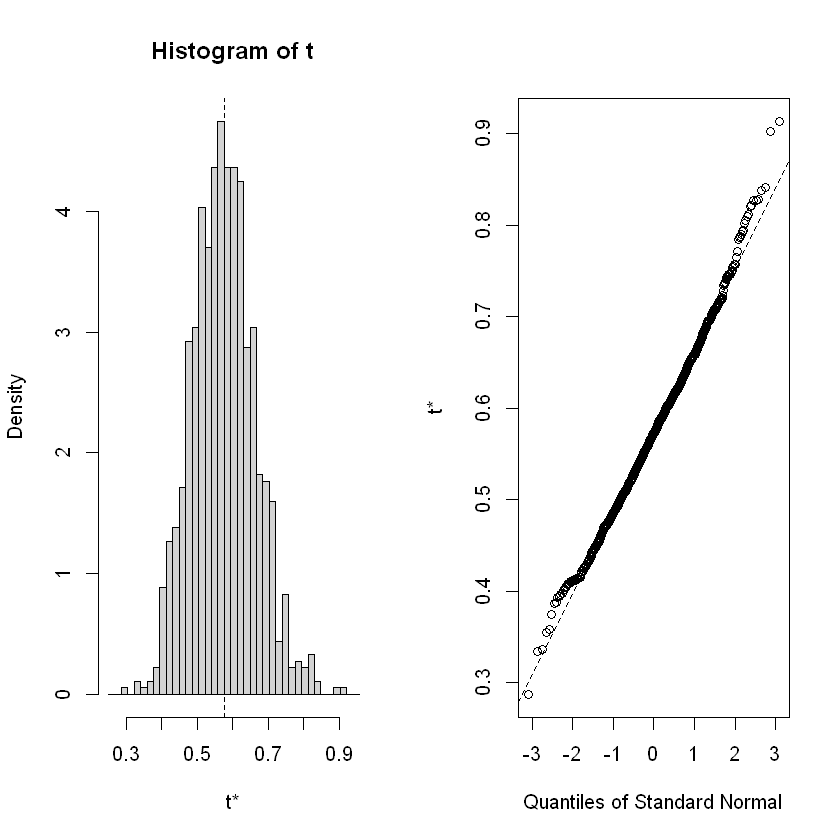

In [10]:
boot.out <- boot(Portfolio, alpha.fn, R = 1000)
# We were interested in the standard error, the bias is negligible.
boot.out
# One is a histogram and it looks like a pretty nice symmetric distribution,
# maybe Gaussian. And in fact the second plot is a qqplot, which plots the
# ordered values against the ordered statistics of a Gaussian.
# And if it lines up on a straight line like it pretty
# much does here, you may say it looks close to Gaussian, maybe
# a slightly bigger tail on the right.
plot(boot.out)
